In [1]:
import os 
import numpy as np
import cv2
from matplotlib import pyplot as plt

In [55]:
#pic = plt.imread("pirate-cannon-main-987391-10417.jpg")
pic = plt.imread("1200px-Zamek_w_Malborku_-_bombar.jpg")

In [56]:
laplacian = cv2.Laplacian(pic, cv2.CV_64F)
sobelx = cv2.Sobel(pic, cv2.CV_64F, 1, 0, ksize = 5)
sobely = cv2.Sobel(pic, cv2.CV_64F, 0, 1, ksize = 5)
edges = cv2.Canny(pic, 100, 300)

#cv2.imshow('original', pic)
#cv2.imshow('laplacian', laplacian)
#cv2.imshow('sobelx', sobelx)
#cv2.imshow('sobely', sobely)
cv2.imshow('Canny', edges)

cv2.waitKey(0)
cv2.destroyAllWindows()

C:\Users\DoritoPower\Anaconda3\lib\site-packages\skimage\segmentation\slic_superpixels.py:156: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  segments_z = grid_z[slices]
C:\Users\DoritoPower\Anaconda3\lib\site-packages\skimage\segmentation\slic_superpixels.py:157: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  segments_y = grid_y[slices]
C:\Users\DoritoPower\Anaconda3\lib\site-packages\skimage\segmentation\slic_superpixels.py:158: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` in

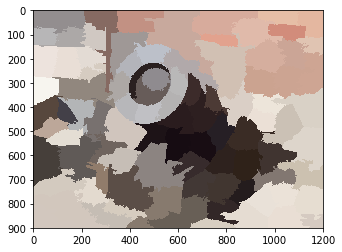

In [62]:
import skimage.segmentation as seg
import skimage.color as color

image_slic = seg.slic(pic,n_segments=155)
segmented = color.label2rgb(image_slic, pic, kind='avg')
plt.imshow(segmented)
plt.show()

In [71]:
gray = np.float32(cv2.cvtColor(segmented,cv2.COLOR_BGR2GRAY))
dst = cv2.cornerHarris(gray,2,3,0.04)
segmented[dst>0.01*dst.max()]=[0,0,255]
cv2.imshow('crnersinsegmented',segmented)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [72]:
###################NOPE

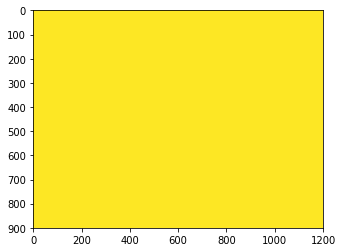

In [85]:
img = cv2.imread('1200px-Zamek_w_Malborku_-_bombar.jpg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2)
sure_bg = cv2.dilate(opening,kernel,iterations=3)

dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
ret, sure_fg = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)

sure_fg = np.uint8(sure_fg)

unknown = cv2.subtract(sure_bg,sure_fg)

ret, markers = cv2.connectedComponents(unknown)

markers = markers+1

markers[unknown==255] = 0

markers = cv2.watershed(img,markers)
img[markers == -1] = [255,0,0]

cv2.imshow('BW',markers)
cv2.waitKey(0)
cv2.destroyAllWindows()